In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
from __future__ import division
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

import logging
logger = logging.getLogger()

17 Amortized Analysis
============

In an __amortized analysis__, we averget the time required to perform a sequence of data-structure operations over all the operations performed.

Amortized analsis differs from average-case analysis in that probability is not involved; an amortized analysis guarantees the _average performance of each operation in the worst case__.

Bear in mind that the charges assigned during an amortized analysis are for analysis purposes only.

When we perform an amortized analysis, we often gain insight into a particular data structure, and this insight can help us optimize the design.

### 17.1 Aggregate analysis
We show that for all $n$, a sequence of $n$ operations takes worst-case time $T(n)$ in total.

##### Stack operations
PUSH $geq$ POP + MULTIPOP     
$1 \times O(n) = O(n)$

##### Incrementing a binary counter

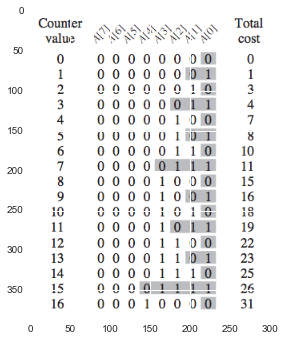

In [2]:
plt.imshow(plt.imread('./res/fig17_2.png'))

In general, for $i = 0, 1, \dotsc, k-1$, bit $A[i]$ flips $\lfloor \frac{n}{2^i} \rfloor$ times in a sequence of $n$ INCREMENT operations on an initially zero counter.

\begin{align}
    \sum_{i=0}^{k-1} \lfloor \frac{n}{2^i} \rfloor &< n \sum_{i=0}^{\infty} \frac{1}{2^i} \\
                                                   &= 2n
\end{align}

### 17.2 The accounting method
**credit**: the cost that an operation's amortized cost $\hat{c_i}$ exceeds its actual cost $c_i$.

requriments: $$\sum_{i=1}^{n} \hat{c_i} \geq \sum_{i=1}^{n} c_i$$


##### Stack operations
|      | $c_i$ | $\hat{c_i}$ |
|------|-------|-------------|
| PUSH |   1   |     2       |
| POP  |   1   |     0       |
|MULTIPOP|  min(k,s)  |   0  |

$2 \times O(n) = O(n)$


##### Incrementing a binary counter
set a bit to 1:   2     
set a bit to 0:   0

The INCREMENT procedure sets at most one bit, $2 \times O(n) = O(n)$

### 17.3 The potential method
Let $D_i$ be the data structure that results after applying the $i$th operation to data structure $D_{i-1}$.

**potential function $\phi$**: maps each data structure $D_i$ to a real number $\phi(D_i)$.

$\hat{c_i} = c_i + \phi(D_i) - \phi(D_{i-1})$     
hence, the total amortized cost of the $n$ operations is:
$$\sum_{i=1}^n \hat{c_i} = \sum_{i=1}^n c_i  + \phi(D_n) - \phi(D_0)$$

Different potential functions may yield different amortized costs yet still be upper bounds on the actual costs. The best potential function to use depends on the disired time bounds.


##### Stack operations
define: $\phi$ to be the number of objects in the stack.

for PUSH: 
\begin{align}
    \hat{c_i} &= c_i + \phi(D_i) - \phi(D_{i-1}) \\
              &= 1 + (s+1) - s \\
              &= 2
\end{align}

for POP: 
\begin{align}
    \hat{c_i} &= c_i + \phi(D_i) - \phi(D_{i-1}) \\
              &= 1 + (s-1) - s \\
              &= 0
\end{align}

for MULTIPOP: 
\begin{align}
    \hat{c_i} &= c_i + \phi(D_i) - \phi(D_{i-1}) \\
              &= k + (s-k) - s \\
              &= 0
\end{align}


##### Incrementing a binary counter
define: $\phi$ to be $b_i$, the number of 1s in the counter after the $i$th operation.

Suppose: the $i$th INCREMENT operation reset $t_i$ bits.

for INCREMENT:
\begin{align}
    \hat{c_i} &= c_i + \phi(D_i) - \phi(D_{i-1}) \\
              &= (t_i + 1) + (b_{i-1} - t_i + 1) - b_{i-1} \\
              &= 2 
\end{align}

### 17.4 Dynamic tables
**load factor**: $$\alpha(T) = \frac{\|\text{items of T}\|}{\|T\|}$$ 

#### 17.4.1 Table expansion
insert an item into a full table, we expand the table with twice spaces.

The cost of the $i$th operation is: 
\begin{equation}
    c_i = \begin{cases}
        i \quad & \text{expand: if i - 1 is an exact power of 2} \\
        1 \quad & \text{otherwise} 
    \end{cases}
\end{equation}

The total cost of $n$ TABLE-INSERT operations is therefore:
\begin{align}
    \sum_{i=1}^{n} c_i &\leq n + \sum_{j=0}^{\lfloor \lg n \rfloor} 2^j \\
                       &< n + 2n \\
                       &= 3n
\end{align}

#### 17.4.2 Table expansion and contraction
Halve the table size when deleting an item causes the table to become less than 1/4 full, rather than 1/2 full as before(引起振荡).
